In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
import feather
pd.set_option('display.max_seq_items', 200)
pd.set_option('max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
train=feather.read_dataframe('./data/train.feather')
test=feather.read_dataframe('./data/test.feather')

In [3]:
train_sample=train.sample(1000000)

# Age

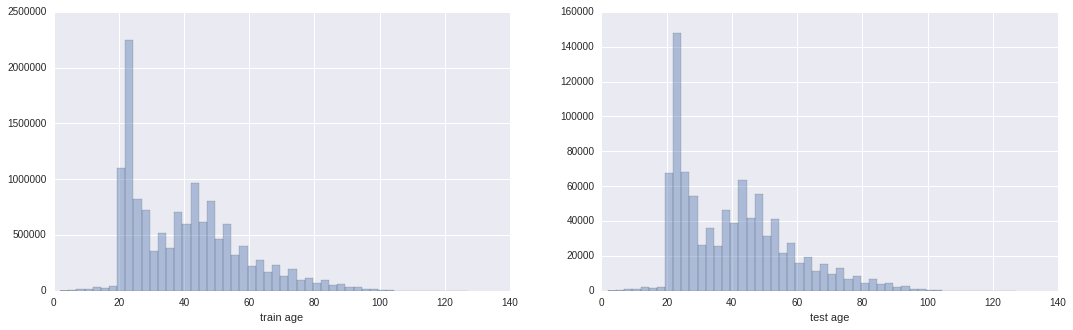

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
sns.distplot(train.age[(train.age>=0) & (train.age<=130)], kde=False, ax=axes[0], axlabel='train age')
sns.distplot(test.age[test.age<=130], kde=False, ax=axes[1], axlabel='test age')


# cod_prov (province code)

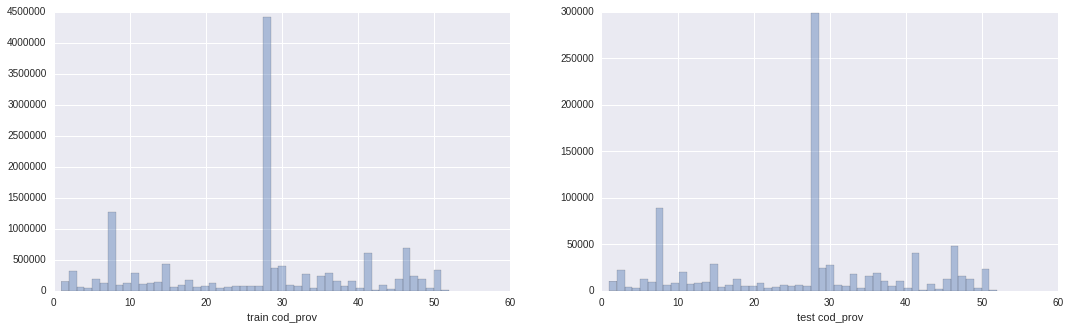

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
sns.distplot(train.cod_prov[train.cod_prov>=0], kde=False, ax=axes[0], axlabel='train cod_prov')
sns.distplot(test.cod_prov[test.cod_prov>=0], kde=False, ax=axes[1], axlabel='test cod_prov')


# Age v.s. Renta (household income)

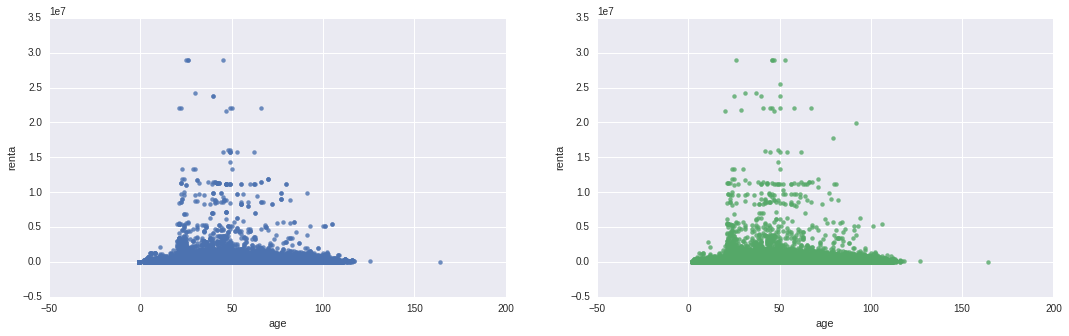

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
sns.regplot('age', 'renta', data=train_sample, fit_reg=False, ax=axes[0])
sns.regplot('age', 'renta', data=test, fit_reg=False, ax=axes[1])


# Cod_prov v.s. Renta

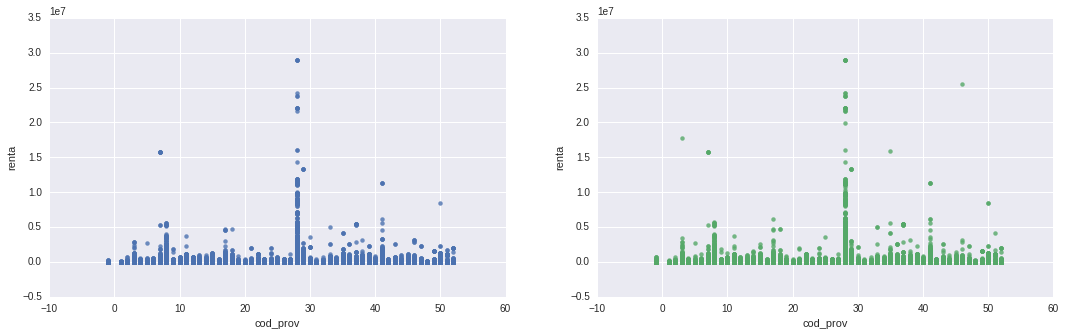

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
sns.regplot('cod_prov', 'renta', data=train_sample, fit_reg=False, ax=axes[0])
sns.regplot('cod_prov', 'renta', data=test, fit_reg=False, ax=axes[1])

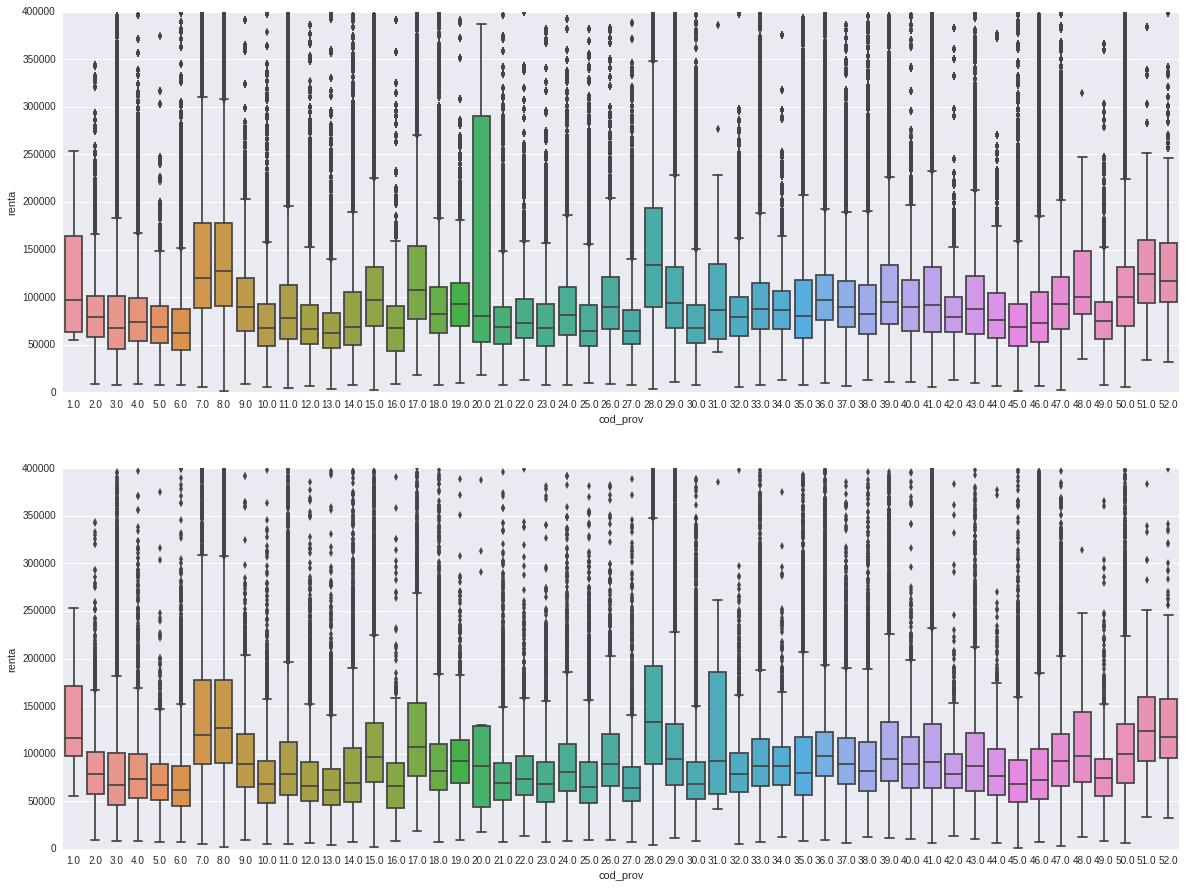

In [9]:
up_renta=400000
low_renta=0

test_select=test.loc[(test.renta<=up_renta) & (test.renta>=low_renta) & (test.cod_prov>0)]
train_select=train.loc[(train.renta<=up_renta) & (train.renta>=low_renta) & (train.cod_prov>0)]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))
sns.boxplot(x='cod_prov', y='renta', data=train_select, ax=axes[0])
sns.boxplot(x='cod_prov', y='renta', data=test_select, ax=axes[1])


# Age v.s. labels  - distribution

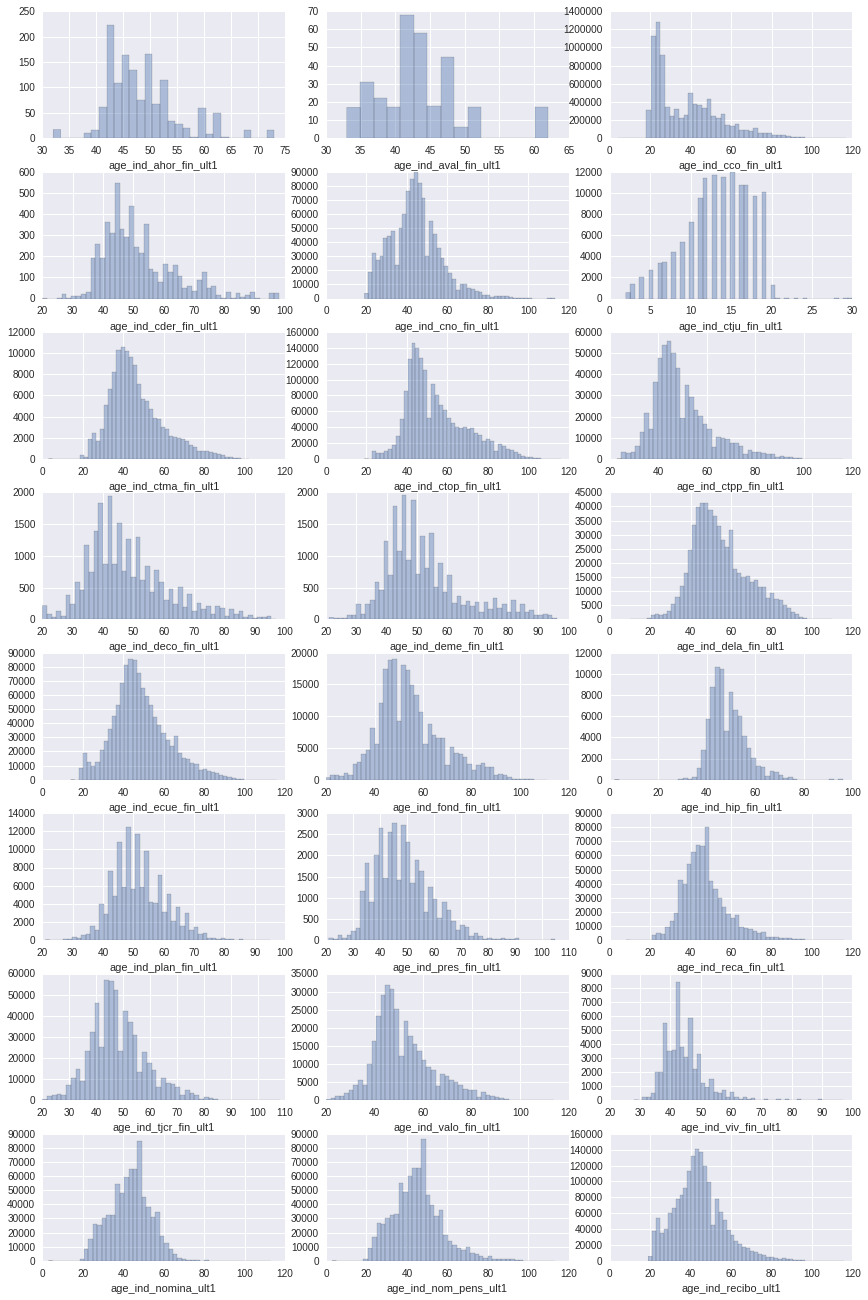

In [39]:
ind_label='ind_ahor_fin_ult1'
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(12,18))
fig.tight_layout()
fig_row=0
for col_id in range(24, 48):
    ax_id=col_id-24
    fig_label='age_'+train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=col_id%3
    sns.distplot(train.age[(train[feat]==1) & (train['age']>0)], kde=False, 
                 axlabel=fig_label, ax=axes[fig_row][fig_col])
    if fig_col==2: fig_row+=1

# Age v.s. labels  - boxplots

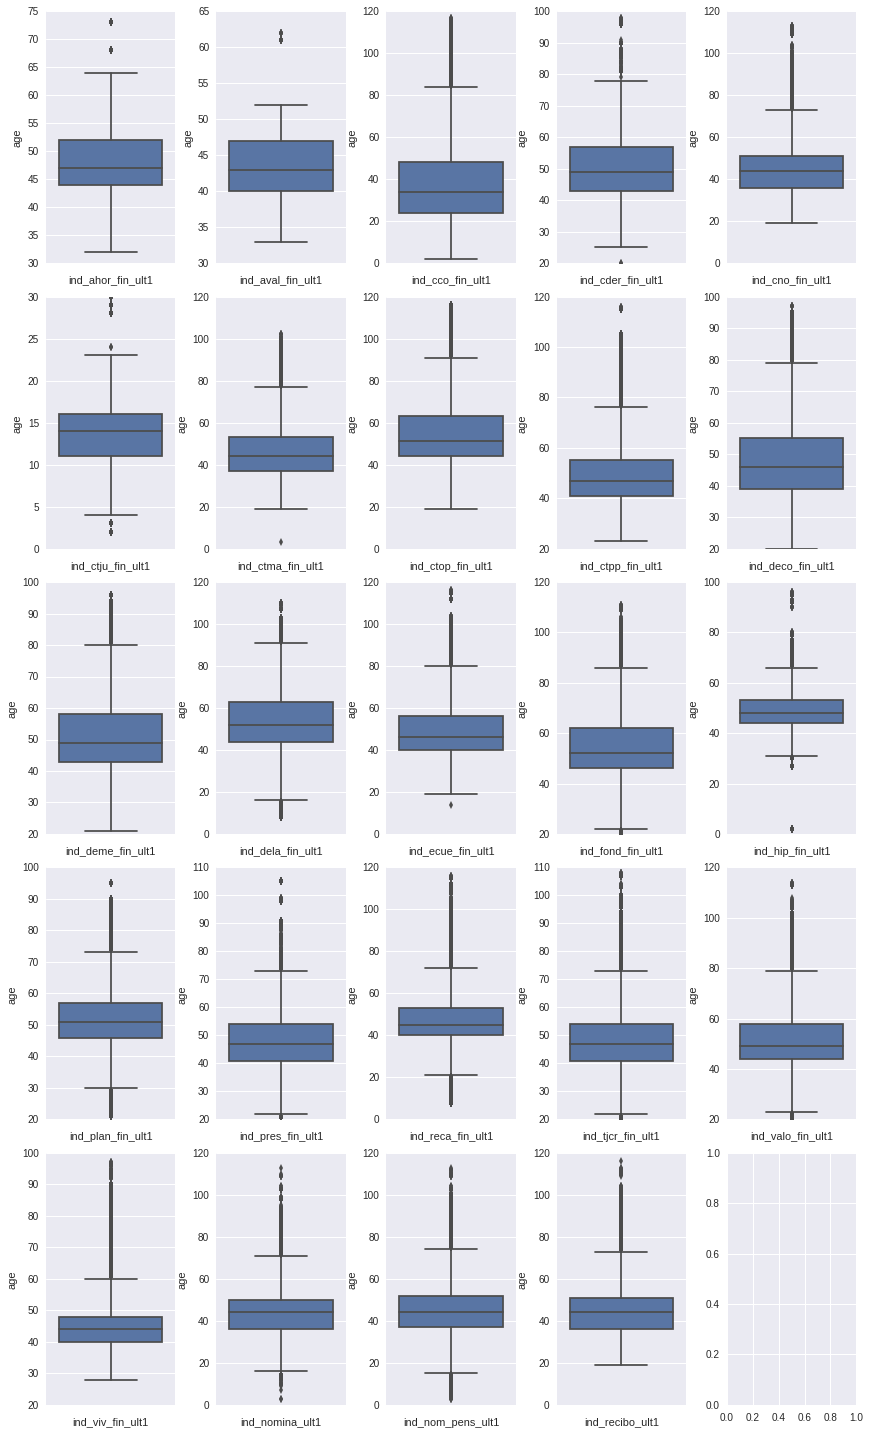

In [45]:
ind_label='ind_ahor_fin_ult1'
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(12,20))
fig.tight_layout()
fig_row=0
for col_id in range(24, 48):
    ax_id=col_id-24
    fig_label=train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id+1)%5
    box_plot=sns.boxplot(y='age', data=train[(train[feat]==1) & (train['age']>0)], ax=axes[fig_row][fig_col])
    box_plot.set(xlabel=fig_label)
    if fig_col==4: fig_row+=1

# cod_prov v.s. labels 

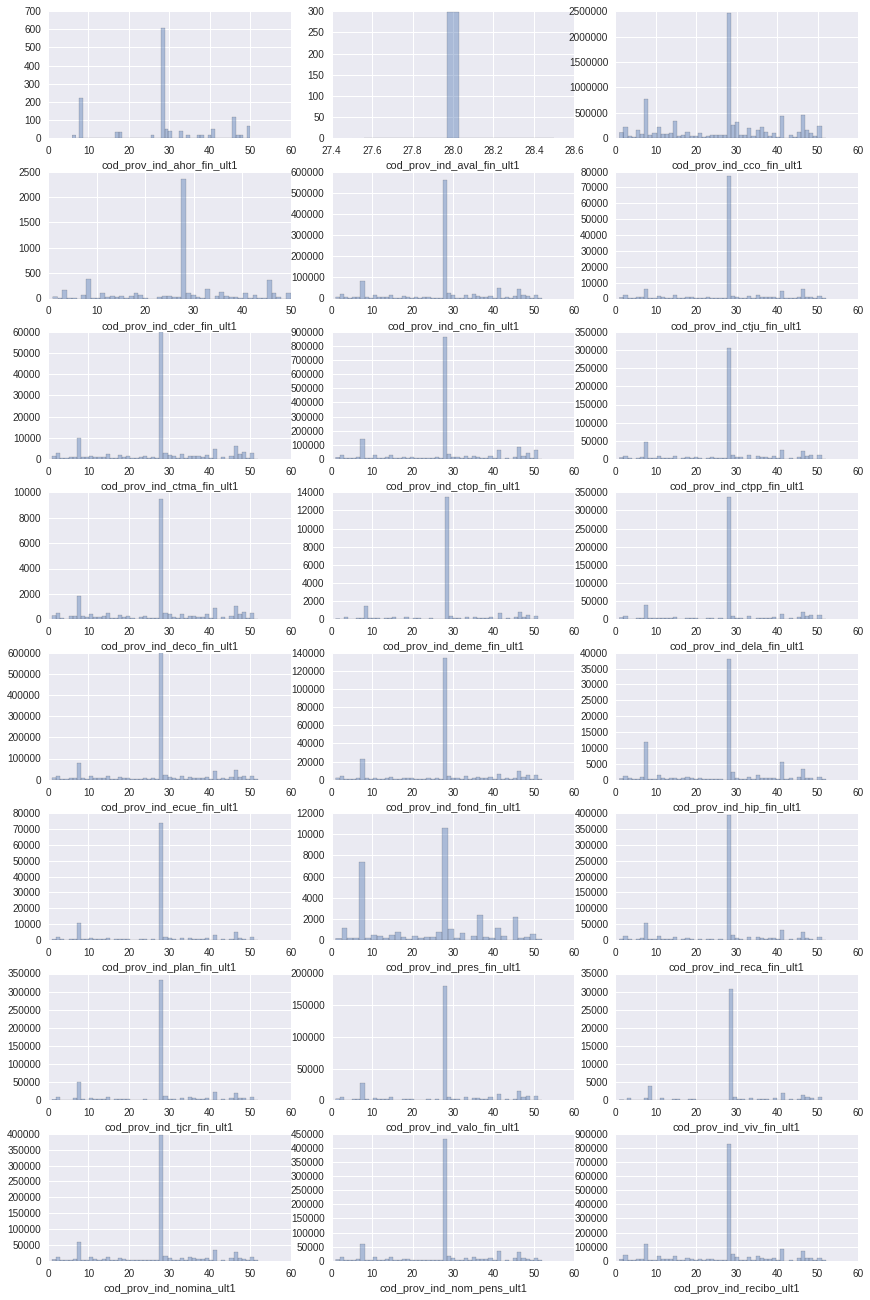

In [48]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(12,18))
fig.tight_layout()
fig_row=0
for col_id in range(24, 48):
    ax_id=col_id-24
    fig_label='cod_prov_'+train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=col_id%3
    sns.distplot(train.cod_prov[(train[feat]==1) & (train['cod_prov']>=0)], kde=False, 
                 axlabel=fig_label, ax=axes[fig_row][fig_col])
    if fig_col==2: fig_row+=1

# sexo v.s. labels 

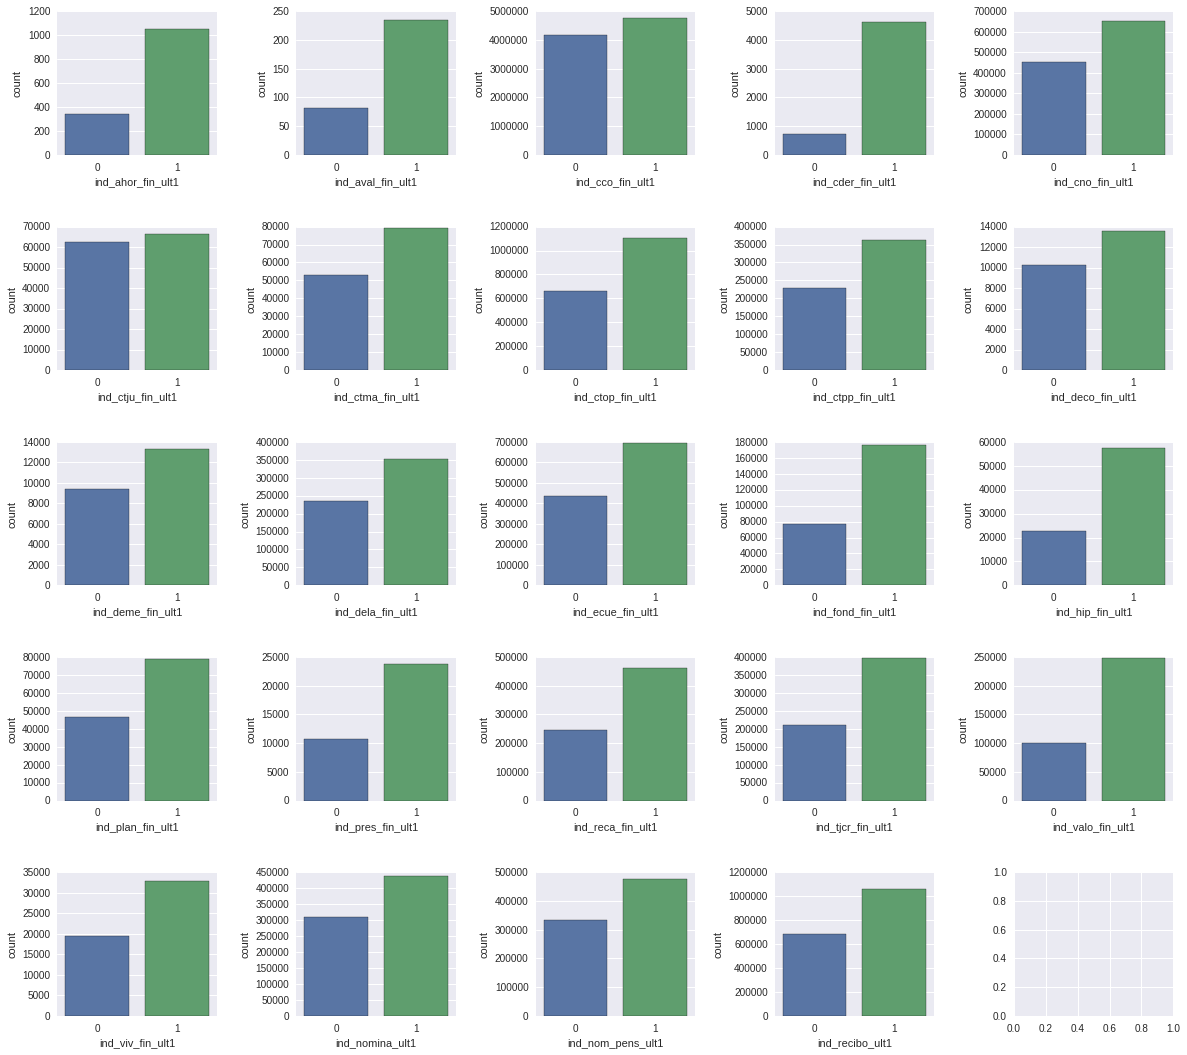

In [60]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,18))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
# fig.tight_layout()
fig_row=0
for col_id in range(24, 48):
    ax_id=col_id-24
    fig_label= train.columns[col_id]
    feat=train.columns[col_id]
    fig_col=(col_id+1)%5
    countplot=sns.countplot(x='sexo', data=train[(train[feat]==1) & (train['sexo']>=0)],ax=axes[fig_row][fig_col])
    countplot.set(xlabel=fig_label)
    if fig_col==4: fig_row+=1